# 5. Support Vector Machine(SVM)
* 매우 강력하고, 선형이나 비선형 분류, 회귀, 이상치 탐색에서 사용할 수 있는 다목적 머신러닝 모델
* 복잡한 분류 문제에 잘 맞으며 작거나 중간 크기의 데이터셋에 적합

## 5.1. 선형 SVM 분류

### 5.1.1. 소프트마진 분류
* 하드마진 분류: 모든 샘플이 도로 바깥에 분류(오차를 허용X)
  - 단점: 데이터가 선형적으로 구분될 수 있어야 함. 이상치에 민감
* 소프트마진 분류: 도로의 폭을 넓게 유지하는 것과 마진 오류(Margin Violation)사이에 적잘한 균형
* 하이퍼 파라미터 C: 낮으면 마진오류가 많고 도록 폭 넓음. 높으면 마진오류 적고 도로폭 좁음.
* SVM 모델이 과대적합이면 C를 감소시켜 모델을 규제
* 힌지 손실 hinge loss 함수를 적용해 적용한 LinearSVC 클래스 사용

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
# 데이터셋 구성
iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # 꽃잎 길이, 너비
y = (iris["target"]==2).astype(np.float64) # Iris-Virginica

In [ ]:
# 파이프라인
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    # C: 제약조건의 강도
    # loss : loss function 설정
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
    ])

In [ ]:
# 학습
svm_clf.fit(X,y)

# 임의의 꽃잎의 길이와 너비를 입력하여 꽃의 종류 예측해보기
svm_clf.predict([[5.5,1.7]])

array([1.])

## 5.2. 비선형 SVM 분류
* 비선형 데이터셋을 다루는 방법: 다항특성을 추가

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [ ]:
# 데이터셋 구성
X,y = make_moons(n_samples=100, noise=0.15)

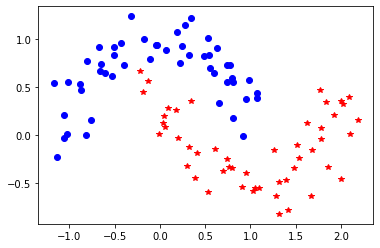

In [ ]:
# 시각화
for j in range(len(X)):
    if y[j] == 1:
        plt.plot(X[j,0],X[j,1],'r*')
    else:
        plt.plot(X[j,0],X[j,1],'bo')
plt.show()

In [ ]:
# 예측에 사용할 sample 구성
Xnew = np.random.rand(100,2); 
Xnew[:,0]=-1.2 + 3.2*Xnew[:,0]; 
Xnew[:,1]=-0.6 + 1.8*Xnew[:,1];

In [ ]:
# 파이프라인
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10, loss="hinge"))
    ])

In [ ]:
# 학습 및 예측
polynomial_svm_clf.fit(X,y)
ynew = polynomial_svm_clf.predict(Xnew)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


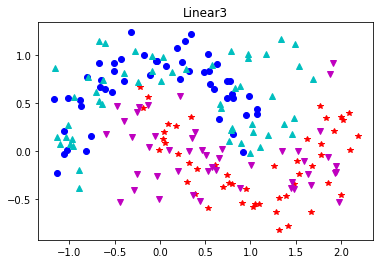

In [ ]:
# 학습에 사용한 데이터
for j in range(len(X)):
    if y[j] == 1:
        plt.plot(X[j,0],X[j,1],'r*')
    else:
        plt.plot(X[j,0],X[j,1],'bo')

# 예측을 통해 나온 데이터
for j in range(len(Xnew)):
    if ynew[j] == 1:
        plt.plot(Xnew[j,0],Xnew[j,1],'mv')
    else:
        plt.plot(Xnew[j,0],Xnew[j,1],'c^')
plt.title("Linear3,")          
plt.show()

### 5.2.1. 다항식 커널

In [ ]:
from sklearn.svm import SVC

In [ ]:
# 파이프라인(degree=3)
poly_kernel_svm_clf1 = Pipeline([
    ("scaler",StandardScaler()),
    # degree: 다항식 커널의 차수 결정
    # cof0: 다항식 커널에 있는 상수항
    # C: 오류를 얼마나 허용할 것인지(클수록 하드마진, 작을수록 소프트마진에 가까움)
    ("svm_clf",SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

In [ ]:
# 학습 및 예측
poly_kernel_svm_clf1.fit(X,y)
ynew = poly_kernel_svm_clf1.predict(Xnew)

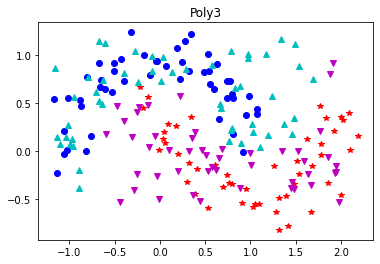

In [ ]:
for j in range(len(X)):
    if y[j] == 1:
        plt.plot(X[j,0],X[j,1],'r*')
    else:
        plt.plot(X[j,0],X[j,1],'bo')
for j in range(len(Xnew)):
    if ynew[j] == 1:
        plt.plot(Xnew[j,0],Xnew[j,1],'mv')
    else:
        plt.plot(Xnew[j,0],Xnew[j,1],'c^')
plt.title("Poly3")          
plt.show()

In [ ]:
# 파이프라인(degree=10)
poly_kernel_svm_clf2 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])

In [ ]:
# 학습 및 예측
poly_kernel_svm_clf2.fit(X,y)
ynew = poly_kernel_svm_clf2.predict(Xnew)

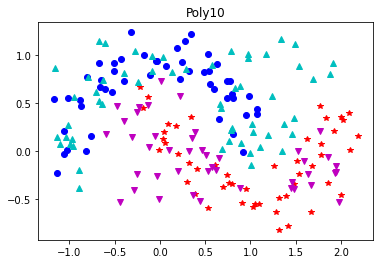

In [ ]:
for j in range(len(X)):
    if y[j] == 1:
        plt.plot(X[j,0],X[j,1],'r*')
    else:
        plt.plot(X[j,0],X[j,1],'bo')
for j in range(len(Xnew)):
    if ynew[j] == 1:
        plt.plot(Xnew[j,0],Xnew[j,1],'mv')
    else:
        plt.plot(Xnew[j,0],Xnew[j,1],'c^')
plt.title("Poly10")        
plt.show()

### 5.2.3. 가우시안 RBF 커널

In [ ]:
# 파이프라인
rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    # gamma: 결정경계를 얼마나 유연하게 그릴지 결정(클수록 오버피팅 발생 가능성 높아짐)
    ("svm_clf",SVC(kernel="rbf", gamma=5, C=0.001))
    ])

In [ ]:
# 학습 및 예측
rbf_kernel_svm_clf.fit(X,y)
ynew = rbf_kernel_svm_clf.predict(Xnew)

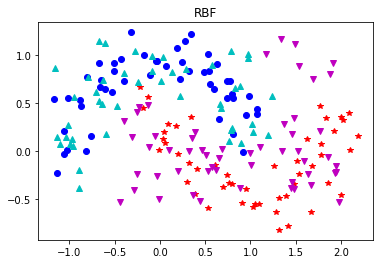

In [ ]:
for j in range(len(X)):
    if y[j] == 1:
        plt.plot(X[j,0],X[j,1],'r*')
    else:
        plt.plot(X[j,0],X[j,1],'bo')
for j in range(len(Xnew)):
    if ynew[j] == 1:
        plt.plot(Xnew[j,0],Xnew[j,1],'mv')
    else:
        plt.plot(Xnew[j,0],Xnew[j,1],'c^')
plt.title("RBF")        
plt.show()

## 5.3. SVM 회귀

In [ ]:
from sklearn.svm import LinearSVR
# epsilon=1.5
svm_reg = LinearSVR(epsilon=1.5)
# epsilon: 도로폭(허용오차)

In [ ]:
# 학습 및 예측
svm_reg.fit(X,y) 
ynew = svm_reg.predict(Xnew)

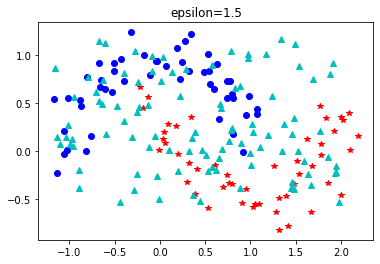

In [ ]:
for j in range(len(X)):
    if y[j] == 1:
        plt.plot(X[j,0],X[j,1],'r*')
    else:
        plt.plot(X[j,0],X[j,1],'bo')
for j in range(len(Xnew)):
    if ynew[j] == 1:
        plt.plot(Xnew[j,0],Xnew[j,1],'mv')
    else:
        plt.plot(Xnew[j,0],Xnew[j,1],'c^')
plt.title("epsilon=1.5")        
plt.show()

In [ ]:
# epsilon=0.5
svm_reg = LinearSVR(epsilon=0.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=0.5)

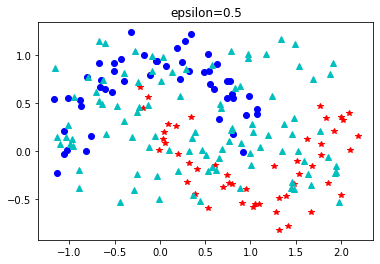

In [ ]:
for j in range(len(X)):
    if y[j] == 1:
        plt.plot(X[j,0],X[j,1],'r*')
    else:
        plt.plot(X[j,0],X[j,1],'bo')
for j in range(len(Xnew)):
    if ynew[j] == 1:
        plt.plot(Xnew[j,0],Xnew[j,1],'mv')
    else:
        plt.plot(Xnew[j,0],Xnew[j,1],'c^')
plt.title("epsilon=0.5")        
plt.show()

In [ ]:
# epsilon=0.1
svm_reg = LinearSVR(epsilon=0.1)
svm_reg.fit(X,y)

LinearSVR(epsilon=0.1)

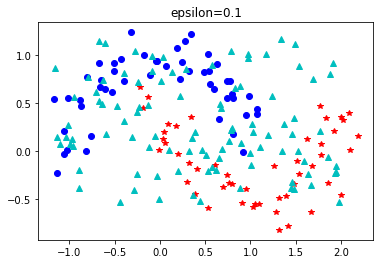

In [ ]:
for j in range(len(X)):
    if y[j] == 1:
        plt.plot(X[j,0],X[j,1],'r*')
    else:
        plt.plot(X[j,0],X[j,1],'bo')
for j in range(len(Xnew)):
    if ynew[j] == 1:
        plt.plot(Xnew[j,0],Xnew[j,1],'mv')
    else:
        plt.plot(Xnew[j,0],Xnew[j,1],'c^')
plt.title("epsilon=0.1")        
plt.show()

# 추가 활동
* 확률적 경사 하강법을 이용해 SVM 훈련하고 모듈을 사용한 결과와 비교해보기

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## 데이터셋 구성

In [5]:
X,y = make_moons(n_samples=100, noise=0.15)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

## 정규화

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 확률적 경사 하강법 사용

### gradient 계산 전 사전 준비
* 우리가 찾고자 하는 것: 최적의 hyperplane
* C: 오류를 얼마나 허용할 것인지(클수록 하드마진, 작을수록 소프트마진에 가까움)
* lambda: 2/C
* f(xi) = w.T.dot(xi) + b
* w는 벡터(1차원 배열)
  - xi와 dot 되어야 하므로 shape가 중요

In [60]:
# xi의 shape 확인
X_train[1].shape, y_train[1].shape

((2,), (1,))

In [99]:
# x와 dot해야 하므로 맞추어 임의의 1차원 배열 생성
w = np.random.randn(2)
b = np.random.randn(1)

In [100]:
w, b

(array([-0.96567488,  0.16112107]), array([0.09895902]))

In [101]:
C = 1
# lambda(예약어)
lambda_ = 2/C

In [102]:
n_epochs = 500
t0, t1 = 5, 100

# 학습 스케줄 : 매 반복에서 학습률을 결정
def learning_schedule(t):
  return t0 / (t+t1)

m = len(X_train)

for epoch in range(n_epochs): # 에포크만큼 반복
  for i in range(m):
    random_index = pd.Series(np.random.randint(m))

    y_train = np.array(y_train)
    y_train = y_train.reshape(-1, 1)

    xi = X_train[int(random_index):int(random_index)+1]
    yi = y_train[int(random_index):int(random_index)+1]

    if b < (1/yi - w.dot(xi.T)).all():
      gradients = lambda_ * w - xi*yi
    else:
      gradients = lambda_  * w
    eta = learning_schedule(epoch * m + i)
    w = w - eta * gradients

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


In [103]:
w, b

(array([[ 0.13666656, -0.17832469]]), array([0.09895902]))

In [119]:
w.shape, X_test[1].shape

((1, 2), (2,))

In [130]:
w.dot(X_test[13] + b)

array([-0.38615418])

In [135]:
SGD_value = [] # 연산하여 값을 넣은 리스트
SGD_pred = [] # 연산한 값을 분류하여 최종적으로 예측한 클래스를 넣을 리스트
# X_test의 각 줄의 데이터를 가져와 연산하여 클래스를 구분
for item in X_test:
  SGD_value.append(w.dot(item) + b)
for value in SGD_value: # 연산한 값을 가져와 반복
  if value > 0:
    SGD_pred.append(1)
  else:
    SGD_pred.append(0)

In [136]:
SGD_pred

[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]

In [137]:
cm = confusion_matrix(y_test, SGD_pred)
cm

array([[ 7,  1],
       [ 0, 17]])

## 모듈 사용

In [26]:
from sklearn.svm import SVC

In [25]:
svc_module = SVC(C=1).fit(X_train, y_train)
svc_module_pred = svc_module.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
cm = confusion_matrix(y_test, svc_module_pred)
cm

array([[ 8,  0],
       [ 0, 17]])

> 확률적 경사 하강법으로 예측한 분류 성능과 비슷한 성능을 보였음
